<center>
    <h1>Instituto Politécnico Nacional</h1>
    <h2>Escuela Superior de Cómputo</h2>
</center>

<br> 
<br>

Asignatura: ***Inteligencia Artificial***<br>

Alumno: ***Suárez Bautista José Manuel***<br>

Boleta: ***2019640115***<br>

Grupo: ***6CM1***<br>

---
<center>
    <h3>Práctica 3</h3>
    <h4>KNN</h4>
    <p>11 de noviembre de 2022</p>
</center>


1. Generar tupla (x, y):

In [42]:
from random import uniform
from random import randrange
def sample():
    """retorna una tupla de valores al azar para las dos 
       carácteristicas de la muestra"""
    x = uniform(0, 20)
    y = uniform(0, 20)
    return(x, y)

2. Generar conjunto de muestras:

In [47]:
import pandas as pd
df_samples = pd.DataFrame(columns=['x', 'y', 'clase'])
def update_df(clase, N):
    """añade 'N' nuevas muestras de clase 'clase' al dataframe"""
    for i in range(N):
        x, y = sample()
        df_samples.loc[len(df_samples)] = [x, y, clase]
        
update_df(0, 30)
update_df(1, 30)
df_samples.head()

,x,y,clase
0,19.194988,7.102841,0.0
1,19.354640,12.889067,0.0
2,1.711596,17.365123,0.0
3,14.706501,0.401391,0.0
4,3.188898,11.263579,0.0


3. Graficando las muestras clasificadas más la nueva:

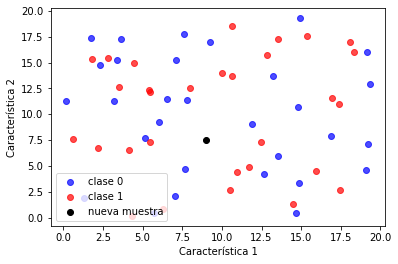

In [61]:
import matplotlib.pyplot as plt
plt.scatter(x = df_samples[df_samples['clase'] == 0]['x'], y = df_samples[df_samples['clase'] == 0]['y'], c = 'blue', alpha=0.7, label='clase 0')
plt.scatter(x = df_samples[df_samples['clase'] == 1]['x'], y = df_samples[df_samples['clase'] == 1]['y'], c = 'red', alpha=0.7, label='clase 1')


plt.xlabel("Característica 1")
plt.ylabel("Característica 2")


new = (9, 7.5)
plt.scatter(new[0], new[1], c = 'black', label = 'nueva muestra')

plt.legend()
plt.show()

4. Calculando la distancia euclidiana del punto nuevo a cada muestra clasificada

In [72]:
from math import sqrt
def distance(s):
    """función que retorna la distancia euclidiana entre dos puntos
       pasamos un pandas series para mayor facilidad"""
    return sqrt((new[0]-s['x'])**2 + (new[1]-s['y'])**2)

In [73]:
df_with_distances = df_samples
df_with_distances['distancia euclidiana'] = df_with_distances.apply(distance, axis = 1)

In [74]:
df_with_distances.head()

,x,y,clase,distancia euclidiana
0,19.194988,7.102841,0.0,10.202721
1,19.354640,12.889067,0.0,11.673072
2,1.711596,17.365123,0.0,12.265459
3,14.706501,0.401391,0.0,9.107931
4,3.188898,11.263579,0.0,6.923398


In [80]:
# ordenamos de menor a mayor distancia
df_with_distances = df_with_distances.sort_values('distancia euclidiana')
print(f'Muestra nueva en ({new[0]}, {new[1]})')
df_with_distances.head(10)

Muestra nueva en (9, 7.5)


,x,y,clase,distancia euclidiana
29,7.665640,4.701495,0.0,3.100347
20,11.875289,9.049942,0.0,3.266437
7,6.060204,9.236249,0.0,3.414229
57,12.435456,7.320711,1.0,3.440131
47,5.430981,7.267367,1.0,3.576593
59,10.976424,4.390370,1.0,3.684569
31,11.728541,4.921508,1.0,3.754139
24,5.122658,7.677081,0.0,3.881383
28,7.772858,11.377830,0.0,4.067363
23,6.530682,11.445684,0.0,4.654670


5. K nearest neighbors:

In [82]:
K = 5
c0 = 0
c1 = 0
for lab, row in df_with_distances.iterrows():
    K -= 1
    if(row['clase'] == 0):
        c0 += 1
    else:
        c1 += 1
    if K == 0:
        break;
print(f'Vecinos clase 0: {c0}')
print(f'Vecinos clase 1: {c1}')
if c0 > c1:
    print("La nueva muestra pertenece a la clase 0")
else:
    print("La nueva muestra pertenece a la clase 1")

Vecinos clase 0: 3
Vecinos clase 1: 2
La nueva muestra pertenece a la clase 0
